In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt
%matplotlib inline

#### (a)

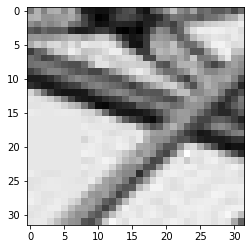

In [2]:
def copyarr(arr, n):
    copyof = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            copyof[i][j] = arr[i][j]
    return copyof

f = np.array(plt.imread('operahall.png'), dtype=float)
copyf = copyarr(f, 32)
plt.imshow(copyf,cmap='gray');


the top left pixel at (0, 0) appears to be the whitest pixel. It is the direct current (DC) or the average of data values


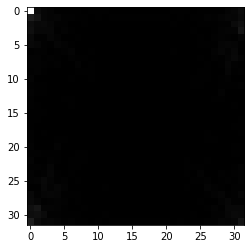

In [3]:
Fmag = np.abs(fft2(copyf))
print("the top left pixel at (0, 0) appears to be the whitest pixel. It is the direct current (DC) or the average of data values")
plt.imshow(Fmag,cmap='gray');

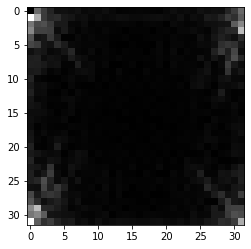

In [4]:
Fmag2 = Fmag
Fmag2[0][0] = 0
plt.imshow(Fmag2,cmap='gray');

#### (b)

In [5]:
def Compress(X, tol):
    N1 = int(len(X))
    N2 = int(N1/32)
    Y = np.zeros((N1, N1))
    nonzero = 0
    dropped_nonzero = 0
    for i in range(N2):
        for j in range(N2):
            subblock = np.zeros((32, 32))
            # subblock = X[(i*32):((i+1)*32), (j*32):((j+1)*32)]
            
            for a in range(32):
                for b in range(32) :
                    if(X[a+i*32][b+j*32] != 0):
                        nonzero += 1
                    subblock[a][b] = X[a+i*32][b+j*32]
                    
            subblock_fourier = fft2(subblock)
            subblock_Fmax = np.max(subblock_fourier)
            
            for a in range(32):
                for b in range(32) :
                        
                    if(np.abs(subblock_fourier[a][b]) <= subblock_Fmax * tol):
                        if(subblock_fourier[a][b] != 0):
                            dropped_nonzero += 1
                        subblock_fourier[a][b] = 0
            
            subblock_compressed = ifft2(subblock_fourier).real
            for a in range(32):
                for b in range(32) :
                    Y[a+i*32][b+j*32] = subblock_compressed[a][b]
            
    drop_ratio = dropped_nonzero/nonzero
    return [Y, drop_ratio]
            
        

#### (c)

In [6]:
a = (Compress(f, 0.00105))
b = (Compress(f, 0.00425))
c = (Compress(f, 0.01075))
d = (Compress(f, 0.03125))

Text(0.5, 1.0, 'Tol = 0.00105, drop ratio = 0.497622')

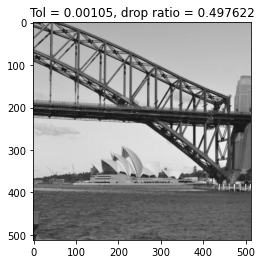

In [7]:
plt.imshow(a[0], cmap='gray')
plt.title("Tol = 0.00105, drop ratio = %f" %a[1])

Text(0.5, 1.0, 'Tol = 0.00425, drop ratio = 0.799827')

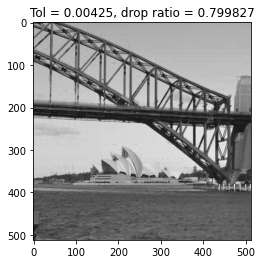

In [8]:
plt.imshow(b[0], cmap='gray')
plt.title("Tol = 0.00425, drop ratio = %f" %b[1])

Text(0.5, 1.0, 'Tol = 0.01075, drop ratio = 0.919502')

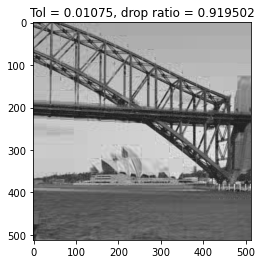

In [9]:
plt.imshow(c[0], cmap='gray')
plt.title("Tol = 0.01075, drop ratio = %f" %c[1])

Text(0.5, 1.0, 'Tol = 0.03125, drop ratio = 0.970470')

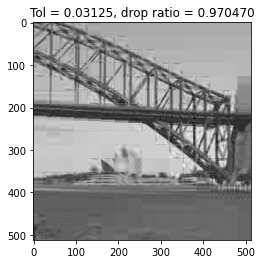

In [10]:
plt.imshow(d[0], cmap='gray')
plt.title("Tol = 0.03125, drop ratio = %f" %d[1])

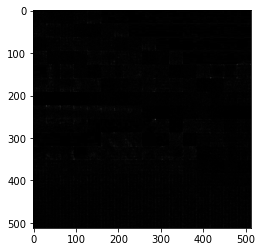

In [11]:
plt.imshow(np.abs(a[0]-f), cmap='gray')